Model Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



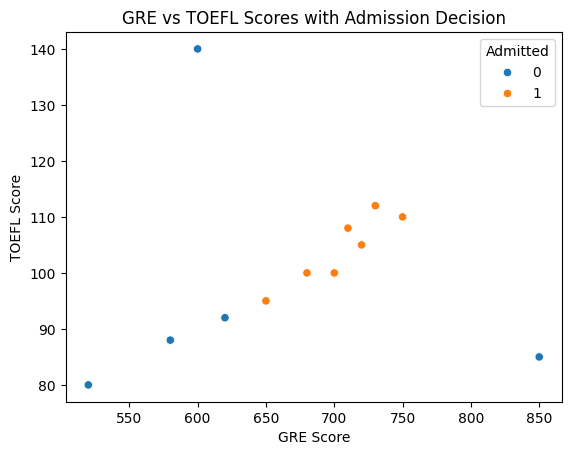

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = {
    "GRE Score": [700, 650, 580, 720, 600, 750, 850, 680, 520, 710, 620, 730],
    "TOEFL Score": [100, 95, 88, 105, 140, 110, 85, 100, 80, 108, 92, 112],
    "Admitted": ["Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)

df['Admitted'] = df['Admitted'].map({'Yes': 1, 'No': 0})

df.fillna(df.mean(), inplace=True)

from scipy.stats import zscore
z_scores = np.abs(zscore(df[['GRE Score', 'TOEFL Score']]))
df = df[(z_scores < 3).all(axis=1)]

X = df[['GRE Score', 'TOEFL Score']]
y = df['Admitted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.scatterplot(x=df["GRE Score"], y=df["TOEFL Score"], hue=df["Admitted"])
plt.title("GRE vs TOEFL Scores with Admission Decision")
plt.show()
